In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define Linear Regression from scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iters):
            # Predictions
            y_pred = X.dot(self.weights) + self.bias
            # Compute gradients
            dw = (1 / n_samples) * (X.T.dot(y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optional: print loss every 100 iters
            if i % (self.n_iters // 5) == 0:
                loss = np.mean((y - y_pred) ** 2)
                print(f"Iteration {i}/{self.n_iters}, MSE: {loss:.4f}")

    def predict(self, X):
        return X.dot(self.weights) + self.bias


In [18]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Feature columns (exclude identifiers and target)
feature_cols = [c for c in train_df.columns if c not in ['id', 'MedHouseVal']]

# Extract features and target
X = train_df[feature_cols].values
y = train_df['MedHouseVal'].values

# Check for missing values
if np.isnan(X).any() or np.isnan(y).any():
    print("Missing values detected. Filling with column means.")
    # Impute X
    col_means = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_means, inds[1])
    # Impute y if necessary
    y = np.nan_to_num(y, nan=np.nanmean(y))


In [19]:
# Feature scaling (standardization)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # prevent division by zero
X_scaled = (X - X_mean) / X_std

# Split into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = LinearRegressionScratch(learning_rate=0.001, n_iters=5000)
model.fit(X_train, y_train)


Iteration 0/5000, MSE: 5.6552
Iteration 1000/5000, MSE: 1.3177
Iteration 2000/5000, MSE: 0.7276
Iteration 3000/5000, MSE: 0.6208
Iteration 4000/5000, MSE: 0.5882


In [20]:
# Validate
y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(np.mean((y_val - y_val_pred) ** 2))
print(f"Validation RMSE: {rmse_val:.4f}")


Validation RMSE: 0.7780


In [21]:
# Retrain on full dataset (scaled)
model_full = LinearRegressionScratch(learning_rate=0.001, n_iters=5000)
model_full.fit(X_scaled, y)


Iteration 0/5000, MSE: 5.6676
Iteration 1000/5000, MSE: 1.3255
Iteration 2000/5000, MSE: 0.7342
Iteration 3000/5000, MSE: 0.6274
Iteration 4000/5000, MSE: 0.5950


In [22]:
# Prepare test features
X_test = test_df[feature_cols].values
# Impute missing and scale
inds_test = np.where(np.isnan(X_test))
if inds_test[0].size > 0:
    X_test[inds_test] = np.take(X_mean, inds_test[1])
X_test_scaled = (X_test - X_mean) / X_std

# Predict on test set
test_preds = model_full.predict(X_test_scaled)


In [23]:

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'MedHouseVal': test_preds
})
submission.to_csv('submission.csv', index=False)


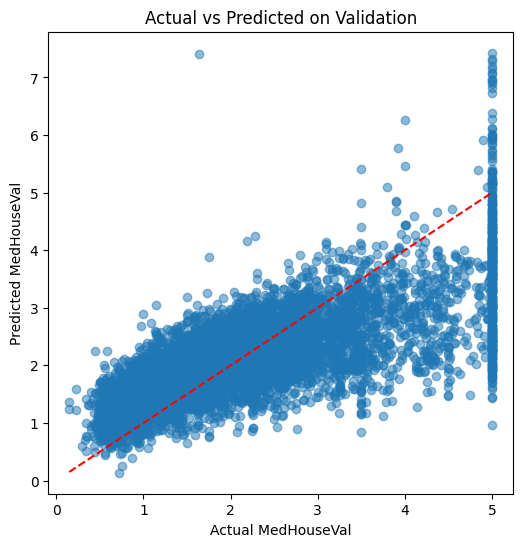

In [24]:

# Plot Actual vs Predicted on validation
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted on Validation')
plt.show()